In [86]:
GreenScreen="/mnt/HDD500/collections/moving_borders/multicolorgreen59.mp4"
BackGround="/mnt/HDD500/collections/Prodia-AI_Art_and_Music_files/joined_with_intro.mp4"
SaveAs="/mnt/HDD500/collections/moving_borders/intro_Green.mp4"

In [95]:
from moviepy.editor import VideoFileClip, CompositeVideoClip, ColorClip

GreenScreen = "/mnt/HDD500/collections/moving_borders/multicolorgreen59.mp4"
BackGround = "/mnt/HDD500/collections/Prodia-AI_Art_and_Music_files/joined_with_intro.mp4"
output = "/mnt/HDD500/collections/moving_borders/intro_Green.mp4"

# Load the background video
background = VideoFileClip(BackGround)

# Load the greenscreen video
greenscreen = VideoFileClip(GreenScreen)

# Set the duration of the greenscreen video to match the background video
greenscreen = greenscreen.set_duration(background.duration)

# Create a custom chroma key effect
def apply_chroma_key(get_frame, t):
    frame = get_frame(t)
    return ColorClip(greenscreen.size, col=frame[:, :, :3], ismask=True)

# Apply chroma keying to remove the green background
greenscreen = greenscreen.fl(lambda gf, t: apply_chroma_key(gf, t))

# Overlay the greenscreen video onto the background video
final_video = CompositeVideoClip([background, greenscreen])

# Write the final video
final_video.write_videofile(output, codec="libx264", audio_codec="aac")


MemoryError: Unable to allocate 469. GiB for an array with shape (167772160000, 3) and data type uint8

In [90]:
from moviepy.editor import VideoFileClip, CompositeVideoClip
from moviepy.video.fx import all

GreenScreen = "/mnt/HDD500/collections/moving_borders/multicolorgreen59.mp4"
BackGround = "/mnt/HDD500/collections/Prodia-AI_Art_and_Music_files/joined_with_intro.mp4"
output = "/mnt/HDD500/collections/moving_borders/intro_Green.mp4"

# Load the background video
background = VideoFileClip(BackGround)

# Load the greenscreen video
greenscreen = VideoFileClip(GreenScreen)

# Set the duration of the greenscreen video to match the background video
greenscreen = greenscreen.set_duration(background.duration)

# Apply chroma keying to remove the green background
def apply_chroma_key(clip, t):
    return all.chroma_key(clip, color=(0, 255, 0), tolerance=0.1)

greenscreen = greenscreen.fl(apply_chroma_key)

# Overlay the greenscreen video onto the background video
final_video = CompositeVideoClip([background, greenscreen])

# Write the final video
final_video.write_videofile(output, codec="libx264", audio_codec="aac")


AttributeError: module 'moviepy.video.fx.all' has no attribute 'chroma_key'

In [88]:
from moviepy.editor import VideoFileClip, CompositeVideoClip
GreenScreen="/mnt/HDD500/collections/moving_borders/multicolorgreen59.mp4"
BackGround="/mnt/HDD500/collections/Prodia-AI_Art_and_Music_files/joined_with_intro.mp4"
output="/mnt/HDD500/collections/moving_borders/intro_Green.mp4"
# Load the background video
background = VideoFileClip(BackGround)

# Load the greenscreen video
greenscreen = VideoFileClip(GreenScreen)

# Set the duration of the greenscreen video to match the background video
greenscreen = greenscreen.set_duration(background.duration)

# Apply chroma keying to remove the green background
greenscreen = greenscreen.fx("chroma_key", color=(0, 255, 0), tolerance=0.1)

# Overlay the greenscreen video onto the background video
final_video = CompositeVideoClip([background, greenscreen])

# Write the final video
final_video.write_videofile(output, codec="libx264", audio_codec="aac")


TypeError: 'str' object is not callable

In [28]:
from moviepy.editor import VideoFileClip, concatenate

# Load the animated GIF
clip = VideoFileClip("/mnt/HDD500/collections/moving_borders/multicolorgreen.gif")

# Set the desired duration and loop count
duration = 120  # in seconds
available_duration = clip.duration
loop_count = int(duration / available_duration) + 1

# Create a list of clips by duplicating the original clip
clips = [clip] * loop_count

# Concatenate the clips together to create the loop effect
looped_clip = concatenate(clips)

# Set the duration of the looped clip
looped_clip = looped_clip.set_duration(duration)

# Save the result as an MP4 file
looped_clip.write_videofile("/mnt/HDD500/collections/moving_borders/multicolorgreen.mp4", fps=clip.fps, codec="libx264", audio=False)

t:   5%|▊              | 61/1200 [1:02:56<00:19, 59.90it/s, now=None]

Moviepy - Building video /mnt/HDD500/collections/moving_borders/multicolorgreen.mp4.
Moviepy - Writing video /mnt/HDD500/collections/moving_borders/multicolorgreen.mp4




t:  59%|█████████▎      | 703/1200 [00:13<00:09, 52.00it/s, now=None]


t:   5%|▊              | 61/1200 [1:03:19<00:19, 59.90it/s, now=None]

Moviepy - Done !
Moviepy - video ready /mnt/HDD500/collections/moving_borders/multicolorgreen.mp4


# Works Fine

In [51]:
!ffmpeg -hide_banner -ignore_loop 0 -i /mnt/HDD500/collections/moving_borders/multicolorgreen.gif -c:v libx264 -pix_fmt yuv420p -crf 4 -b:v 300K -vf scale=640:-1 -t 59 /mnt/HDD500/collections/moving_borders/multicolorgreen59.mp4

Input #0, gif, from '/mnt/HDD500/collections/moving_borders/multicolorgreen.gif':
  Metadata:
    comment         : Created with GIMP
  Duration: 00:00:00.30, start: 0.000000, bitrate: 263 kb/s
    Stream #0:0: Video: gif, bgra, 640x640, 12.92 fps, 19.33 tbr, 100 tbn, 100 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (gif (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x5611da5d6e80] using cpu capabilities: MMX2 SSE2Fast LZCNT SSSE3 SSE4.2
[libx264 @ 0x5611da5d6e80] profile High, level 3.0
[libx264 @ 0x5611da5d6e80] 264 - core 155 r2917 0a84d98 - H.264/MPEG-4 AVC codec - Copyleft 2003-2018 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=3 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1

In [54]:
!ffmpeg -hide_banner -framerate 10 -pattern_type glob -i '/home/jack/Desktop/HDD500/collections/newstuff/*.png' -c:v libx264 -pix_fmt yuv420p -y  /home/jack/Desktop/HDD500/collections/newstuff/out.mp4

Input #0, image2, from '/home/jack/Desktop/HDD500/collections/newstuff/*.png':
  Duration: 00:00:21.50, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 640x640, 10 fps, 10 tbr, 10 tbn, 10 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x564fae3083c0] using cpu capabilities: MMX2 SSE2Fast LZCNT SSSE3 SSE4.2
[libx264 @ 0x564fae3083c0] profile High, level 2.2
[libx264 @ 0x564fae3083c0] 264 - core 155 r2917 0a84d98 - H.264/MPEG-4 AVC codec - Copyleft 2003-2018 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=3 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=1 weightb=1 open_gop=0 weightp=2 keyint=250 ke

In [64]:
!ffmpeg -hide_banner -framerate 25 -pattern_type glob -i '/mnt/HDD500/collections/newstuff/*.png' -c:v libx264 -pix_fmt yuv420p -t 120 /mnt/HDD500/collections/newstuff/testout.mp4


Input #0, image2, from '/mnt/HDD500/collections/newstuff/*.png':
  Duration: 00:00:08.60, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 640x640, 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x563139458440] using cpu capabilities: MMX2 SSE2Fast LZCNT SSSE3 SSE4.2
[libx264 @ 0x563139458440] profile High, level 3.0
[libx264 @ 0x563139458440] 264 - core 155 r2917 0a84d98 - H.264/MPEG-4 AVC codec - Copyleft 2003-2018 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=3 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=1 weightb=1 open_gop=0 weightp=2 keyint=250 keyint_min=25 sc

# ------------------------------ All Above Works 

In [70]:
!ffmpeg -ignore_loop 0 -i /home/jack/Desktop/HDD500/collections/moving_borders/4.gif -vf "fps=25,chromakey=green:0.1:0.1" -c:v libx264 -pix_fmt yuv420p -t 180 -y /home/jack/Desktop/HDD500/collections/moving_borders/walkingants2.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

# joined_with_intro.mp4
/home/jack/Desktop/HDD500/collections/moving_borders/4.gif
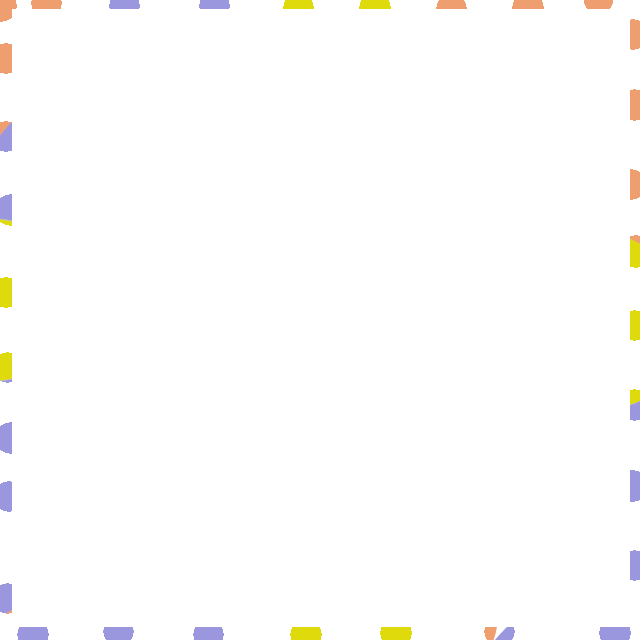

In [63]:
!ls /mnt/HDD500/collections/newstuff/

1080_2022-12-05-04:231670185388.png  1080_2022-12-05-06:391670193588.png
1080_2022-12-05-04:241670185454.png  1080_2022-12-05-06:401670193620.png
1080_2022-12-05-04:251670185527.png  1080_2022-12-05-06:441670193869.png
1080_2022-12-05-04:261670185565.png  1080_2022-12-05-06:481670194087.png
1080_2022-12-05-04:271670185625.png  1080_2022-12-05-06:481670194107.png
1080_2022-12-05-04:271670185641.png  1080_2022-12-05-06:481670194121.png
1080_2022-12-05-04:271670185656.png  1080_2022-12-05-06:491670194150.png
1080_2022-12-05-04:271670185674.png  1080_2022-12-05-06:491670194166.png
1080_2022-12-05-04:281670185690.png  1080_2022-12-05-06:491670194198.png
1080_2022-12-05-04:281670185712.png  1080_2022-12-05-06:511670194316.png
1080_2022-12-05-04:371670186246.png  1080_2022-12-05-06:541670194466.png
1080_2022-12-05-04:371670186266.png  1080_2022-12-05-06:551670194512.png
1080_2022-12-05-04:391670186361.png  1080_2022-12-05-06:551670194534.png
1080_2022-12-05-04:391670186380.png  1080_2022-12-0

In [ ]:
from moviepy.editor import VideoFileClip, CompositeVideoClip

# Load the background video
background = VideoFileClip("background.mp4")

# Load the greenscreen video
greenscreen = VideoFileClip("greenscreen.mp4")

# Set the duration of the greenscreen video to match the background video
greenscreen = greenscreen.set_duration(background.duration)

# Apply chroma keying to remove the green background
greenscreen = greenscreen.fx("chroma_key", color=(0, 255, 0), tolerance=0.1)

# Overlay the greenscreen video onto the background video
final_video = CompositeVideoClip([background, greenscreen])

# Write the final video
final_video.write_videofile("final_output.mp4", codec="libx264", audio_codec="aac")


In [ ]:
from moviepy.editor import VideoFileClip, ImageClip, CompositeVideoClip

# Load the resulting video
video = VideoFileClip("output.mp4")

# Load the smaller images as ImageClip objects
image1 = ImageClip("image1.png").set_duration(video.duration)
image2 = ImageClip("image2.png").set_duration(video.duration)

# Position and resize the smaller images as desired
image1 = image1.set_position((100, 100)).resize(width=200)
image2 = image2.set_position((500, 200)).resize(width=150)

# Composite the smaller images onto the video
final_video = CompositeVideoClip([video, image1, image2])

# Write the final video
final_video.write_videofile("final_output.mp4", codec="libx264", audio_codec="aac")


In [ ]:
ffmpeg -i background.mp4 -i border.mp4 -filter_complex "[0:v][1:v]overlay=0:0[outv]" -map "[outv]" -map 0:a -c:v libx264 -c:a copy output.mp4


In [ ]:
ffmpeg -i background.mp4 -i border.mp4 -filter_complex "[0:v][1:v]overlay=0:0[outv]" -map "[outv]" -map 0:a -c:v libx264 -c:a copy output.mp4


In [82]:
!ffmpeg -i /mnt/HDD500/collections/Prodia-AI_Art_and_Music_files/joined_with_intro.mp4 -i /home/jack/Desktop/HDD500/collections/moving_borders/multicolorgreen120.mp4 -filter_complex "[1:v]chromakey=green:0.1:0.1[bg];[bg][0:v]overlay=format=auto" -c:v libx264 -pix_fmt yuv420p -t 120 -y /home/jack/Desktop/HDD500/collections/moving_borders/walkingantsMC.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
multicolorgreen120.mp4

In [79]:
!ffmpeg -i /mnt/HDD500/collections/Prodia-AI_Art_and_Music_files/joined_with_intro.mp4 -i /home/jack/Desktop/HDD500/collections/moving_borders/multicolorgreen120.mp4  -shortest -filter_complex "[1:v]chromakey=0x70de77:0.1:0.2[ckout];[0:v][ckout]overlay[out]" -map "[out]" -t 25 -y /home/jack/Desktop/HDD500/collections/moving_borders/output.mkv

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [65]:
!ffmpeg -f image2 -pattern_type glob -i '/home/jack/Desktop/HDD500/collections/newstuff/*.png' -i "/home/jack/Desktop/HDD500/collections/newstuff/out.mp4" -filter_complex "[0:v]concat=n=1:v=1:a=0,format=yuv444p[v]" -map "[v]" -t 59 /home/jack/Desktop/HDD500/collections/newstuff/testout2.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [71]:
!ffmpeg -f lavfi -i color=green:640x640:d=120 -ignore_loop 0 -i /home/jack/Desktop/HDD500/collections/moving_borders/4.gif -filter_complex "[0:v][1:v]overlay=format=auto" -c:v libx264 -pix_fmt yuv420p -t 120 -y /home/jack/Desktop/HDD500/collections/moving_borders/walkingants3.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [68]:
!ffmpeg -f lavfi -i color=green:640x640:d=120 -ignore_loop 0 -i /home/jack/Desktop/HDD500/collections/moving_borders/multicolor.gif -filter_complex "[0:v][1:v]overlay=format=auto" -c:v libx264 -pix_fmt yuv420p -t 120 -y /home/jack/Desktop/HDD500/collections/moving_borders/walkingants-multicolor.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [9]:
!ffmpeg -i /home/jack/Desktop/HDD500/collections/moving_borders/walkingants.webm -c:v libx264 -pix_fmt yuv420p -t 180 -y /home/jack/Desktop/HDD500/collections/moving_borders/walkingants2.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [3]:
!ffmpeg -ignore_loop 0 -i /home/jack/Desktop/HDD500/collections/moving_borders/4.gif -vf "fps=25,loop=512:512:0" -c:v libx264 -pix_fmt yuv420p -t 180 /home/jack/Desktop/HDD500/collections/moving_borders/walkingants.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [72]:
!ffmpeg -ignore_loop 0 -i /home/jack/Desktop/HDD500/collections/moving_borders/4.gif -vf "fps=25,loop=512:512:0" -c:v libx264 -pix_fmt yuv420p -t 180 /home/jack/Desktop/HDD500/collections/moving_borders/walkingantstest.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [43]:
from moviepy.editor import concatenate_videoclips, ColorClip, ImageSequenceClip
import numpy as np

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border5.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Load images using moviepy ColorClip with black frames
image_clips = [
    ColorClip((512, 512), color=[0, 0, 0], duration=image_duration)
    for _ in image_files
]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (2 * image_duration))

# Create a list of clips with alternating images and blank frames
clips = []
for i in range(num_repetitions):
    clips.append(image_clips[i % len(image_clips)])
    clips.append(ColorClip((512, 512), color=[0, 0, 0], duration=image_duration))

# Concatenate the clips
final_clip = concatenate_videoclips(clips)

# Set the final video duration and frame rate
final_clip = final_clip.set_duration(total_duration).set_fps(25)

# Modify the ImageSequenceClip class to handle cases where t is greater than the last image's starting time
def find_image_index(self, t):
    for i in range(len(self.sequence)):
        if self.images_starts[i] > t:
            return max(0, i - 1)
    return len(self.sequence) - 1

ImageSequenceClip.find_image_index = find_image_index

# Calculate the number of frames for the border clip
num_frames = int(image_duration * final_clip.fps)

# Create a border clip with walking ants effect
border_width = 10
border_color = (0, 255, 0)  # Green color
border_clip = ImageSequenceClip(
    [image_clips[0].get_frame(0)] * num_frames,
    durations=[image_duration]
).mirror().margin(
    left=border_width, right=border_width, top=border_width, bottom=border_width,
    color=border_color
).set_duration(total_duration)

# Composite the image clips with the border clip
composite_clip = concatenate_videoclips([border_clip, final_clip])

# Export the final video
composite_clip.write_videofile(mp4, fps=25)


IndexError: list index out of range

In [41]:
from moviepy.editor import concatenate_videoclips, ColorClip, ImageSequenceClip
import numpy as np

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border5.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Load images using moviepy ColorClip with black frames
image_clips = [
    ColorClip((512, 512), color=[0, 0, 0], duration=image_duration)
    for _ in image_files
]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (2 * image_duration))

# Create a list of clips with alternating images and blank frames
clips = []
for i in range(num_repetitions):
    clips.append(image_clips[i % len(image_clips)])
    clips.append(ColorClip((512, 512), color=[0, 0, 0], duration=image_duration))

# Concatenate the clips
final_clip = concatenate_videoclips(clips)

# Set the final video duration
final_clip = final_clip.set_duration(total_duration)

# Modify the ImageSequenceClip class to handle cases where t is greater than the last image's starting time
def find_image_index(t):
    for i in range(len(self.sequence)):
        if self.images_starts[i] > t:
            return i - 1
    return len(self.sequence) - 1

ImageSequenceClip.find_image_index = find_image_index

# Calculate the number of frames for the border clip
num_frames = int(image_duration * final_clip.fps)

# Create a border clip with walking ants effect
border_width = 10
border_color = (0, 255, 0)  # Green color
border_clip = ImageSequenceClip(
    [image_clips[0].get_frame(0)] * num_frames,
    durations=[image_duration]
).mirror().margin(
    left=border_width, right=border_width, top=border_width, bottom=border_width,
    color=border_color
).set_duration(total_duration)

# Composite the image clips with the border clip
composite_clip = concatenate_videoclips([border_clip, final_clip])

# Export the final video
composite_clip.write_videofile(mp4, fps=25)


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [40]:
from moviepy.editor import concatenate_videoclips, ColorClip, ImageSequenceClip
import numpy as np

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border5.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Load images using moviepy ColorClip with black frames
image_clips = [
    ColorClip((512, 512), color=[0, 0, 0], duration=image_duration)
    for _ in image_files
]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (2 * image_duration))

# Create a list of clips with alternating images and blank frames
clips = []
for i in range(num_repetitions):
    clips.append(image_clips[i % len(image_clips)])
    clips.append(ColorClip((512, 512), color=[0, 0, 0], duration=image_duration))

# Concatenate the clips
final_clip = concatenate_videoclips(clips)

# Set the final video duration
final_clip = final_clip.set_duration(total_duration)

# Modify the ImageSequenceClip class to handle cases where t is greater than the last image's starting time
def find_image_index(t):
    for i in range(len(self.sequence)):
        if self.images_starts[i] > t:
            return i - 1
    return len(self.sequence) - 1

ImageSequenceClip.find_image_index = find_image_index

# Create a border clip with walking ants effect
border_width = 10
border_color = (0, 255, 0)  # Green color
border_clip = ImageSequenceClip(
    [image_clips[0].get_frame(0)] * int(image_duration * final_clip.fps),
    durations=[image_duration]
).mirror().margin(
    left=border_width, right=border_width, top=border_width, bottom=border_width,
    color=border_color
).set_duration(total_duration)

# Composite the image clips with the border clip
composite_clip = concatenate_videoclips([border_clip, final_clip])

# Export the final video
composite_clip.write_videofile(mp4, fps=25)


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [39]:
from moviepy.editor import concatenate_videoclips, ImageSequenceClip

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border5.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(image_files) * image_duration))

# Repeat the image clips
repeated_clips = concatenate_videoclips(image_clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Set the frame rate for the border clip
frame_rate = final_clip.fps if final_clip.fps is not None else 25

# Calculate the number of frames for the border clip
num_frames = int(image_duration * frame_rate)

# Create a transparent border clip with walking ants effect
border_width = 10
border_color = (0, 255, 0)  # Green color

border_clip = ImageSequenceClip(
    [image_clips[0].get_frame(0)] * num_frames,
    durations=[image_duration]
).mirror().margin(
    left=border_width, right=border_width, top=border_width, bottom=border_width,
    color=border_color
).set_duration(total_duration)

# Composite the image clips with the border clip
composite_clip = concatenate_videoclips([border_clip, final_clip])

# Export the final video
composite_clip.write_videofile(mp4, fps=frame_rate)


IndexError: list index out of range

In [38]:
from moviepy.editor import concatenate_videoclips, ImageSequenceClip

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border5.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(image_files) * image_duration))

# Repeat the image clips
repeated_clips = concatenate_videoclips(image_clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Calculate the number of frames for the border clip
num_frames = int(image_duration * final_clip.fps)

# Create a transparent border clip with walking ants effect
border_width = 10
border_color = (0, 255, 0)  # Green color

border_clip = ImageSequenceClip(
    [image_clips[0].get_frame(0)] * num_frames,
    durations=[image_duration]
).mirror().margin(
    left=border_width, right=border_width, top=border_width, bottom=border_width,
    color=border_color
).set_duration(total_duration)

# Composite the image clips with the border clip
composite_clip = concatenate_videoclips([border_clip, final_clip])

# Export the final video
composite_clip.write_videofile(mp4, fps=25)


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [37]:
from moviepy.editor import concatenate_videoclips, ImageSequenceClip

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border5.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(image_files) * image_duration))

# Repeat the image clips
repeated_clips = concatenate_videoclips(image_clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Create a transparent border clip with walking ants effect
border_width = 10
border_color = (0, 255, 0)  # Green color

border_clip = ImageSequenceClip(
    [image_clips[0].get_frame(0)] * int(image_duration * final_clip.fps),
    durations=[image_duration]
).mirror().margin(
    left=border_width, right=border_width, top=border_width, bottom=border_width,
    color=border_color
).set_duration(total_duration)

# Composite the image clips with the border clip
composite_clip = concatenate_videoclips([border_clip, final_clip])

# Export the final video
composite_clip.write_videofile(mp4, fps=25)


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [36]:
from moviepy.editor import concatenate_videoclips, ImageSequenceClip, fx

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border5.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(image_files) * image_duration))

# Repeat the image clips
repeated_clips = concatenate_videoclips(image_clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Create a transparent border clip with walking ants effect
border_width = 10
border_color = (0, 255, 0)  # Green color

border_clip = ImageSequenceClip(
    [np.ones_like(image_clips[0].get_frame(0)) * border_color],
    durations=[image_duration]
).fx(fx.time_mirror).margin(
    left=border_width, right=border_width, top=border_width, bottom=border_width,
    opacity=0
).set_duration(total_duration)

# Composite the image clips with the border clip
composite_clip = concatenate_videoclips([border_clip, final_clip])

# Export the final video
composite_clip.write_videofile(mp4, fps=25)


ImportError: cannot import name 'fx' from 'moviepy.editor' (/home/jack/miniconda3/envs/cloned_base/lib/python3.9/site-packages/moviepy/editor.py)

In [33]:
from moviepy.editor import concatenate_videoclips, ImageSequenceClip

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border6.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(image_files) * image_duration))

# Repeat the image clips
repeated_clips = concatenate_videoclips(image_clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Export the final video
final_clip.write_videofile(mp4, fps=25)



                                                                     
t:  51%|███████▋       | 2289/4500 [14:54<00:24, 92.01it/s, now=None]
                                                                     
t:  51%|███████▋       | 2289/4500 [14:54<00:24, 92.01it/s, now=None]

Moviepy - Building video /mnt/HDD500/collections/moving_borders/border5.mp4.
Moviepy - Writing video /mnt/HDD500/collections/moving_borders/border5.mp4





t:   0%|                          | 0/4500 [00:00<?, ?it/s, now=None]

t:   0%|                  | 2/4500 [00:00<04:50, 15.49it/s, now=None]

t:   0%|                  | 5/4500 [00:00<03:15, 23.02it/s, now=None]

t:   0%|                 | 10/4500 [00:00<02:12, 33.92it/s, now=None]

t:   0%|                 | 17/4500 [00:00<01:38, 45.43it/s, now=None]

t:   1%|                 | 24/4500 [00:00<01:28, 50.66it/s, now=None]

t:   1%|                 | 30/4500 [00:00<01:31, 48.80it/s, now=None]

t:   1%|▏                | 37/4500 [00:00<01:23, 53.74it/s, now=None]

t:   1%|▏                | 45/4500 [00:00<01:13, 60.54it/s, now=None]

t:   1%|▏                | 52/4500 [00:01<01:20, 55.57it/s, now=None]

t:   1%|▏                | 60/4500 [00:01<01:12, 61.40it/s, now=None]

t:   1%|▎                | 67/4500 [00:01<01:11, 62.34it/s, now=None]

t:   2%|▎                | 74/4500 [00:01<01:14, 59.49it/s, now=None]

t:   2%|▎                | 81/4500 [00:01<01:23, 52.75it/s, now=None]

t:  

t:  31%|████▌          | 1375/4500 [00:25<00:48, 63.96it/s, now=None]

t:  31%|████▌          | 1382/4500 [00:25<00:49, 63.16it/s, now=None]

t:  31%|████▋          | 1389/4500 [00:26<00:48, 64.48it/s, now=None]

t:  31%|████▋          | 1396/4500 [00:26<00:50, 61.15it/s, now=None]

t:  31%|████▋          | 1403/4500 [00:26<00:50, 61.27it/s, now=None]

t:  31%|████▋          | 1410/4500 [00:26<00:51, 59.90it/s, now=None]

t:  31%|████▋          | 1417/4500 [00:26<00:53, 57.73it/s, now=None]

t:  32%|████▋          | 1423/4500 [00:26<00:57, 53.84it/s, now=None]

t:  32%|████▊          | 1429/4500 [00:26<00:57, 53.24it/s, now=None]

t:  32%|████▊          | 1435/4500 [00:26<00:58, 52.26it/s, now=None]

t:  32%|████▊          | 1442/4500 [00:26<00:55, 55.52it/s, now=None]

t:  32%|████▊          | 1448/4500 [00:27<00:59, 51.44it/s, now=None]

t:  32%|████▊          | 1454/4500 [00:27<01:02, 49.09it/s, now=None]

t:  32%|████▊          | 1459/4500 [00:27<01:12, 42.14it/s, now=None]

t:  33

t:  58%|████████▋      | 2592/4500 [00:52<00:36, 51.79it/s, now=None]

t:  58%|████████▋      | 2598/4500 [00:52<00:38, 49.18it/s, now=None]

t:  58%|████████▋      | 2604/4500 [00:52<00:37, 51.12it/s, now=None]

t:  58%|████████▋      | 2610/4500 [00:52<00:38, 48.72it/s, now=None]

t:  58%|████████▋      | 2615/4500 [00:52<00:43, 43.65it/s, now=None]

t:  58%|████████▋      | 2621/4500 [00:52<00:40, 46.54it/s, now=None]

t:  58%|████████▊      | 2629/4500 [00:52<00:34, 54.88it/s, now=None]

t:  59%|████████▊      | 2636/4500 [00:52<00:32, 57.44it/s, now=None]

t:  59%|████████▊      | 2642/4500 [00:53<00:36, 50.47it/s, now=None]

t:  59%|████████▊      | 2648/4500 [00:53<00:37, 48.98it/s, now=None]

t:  59%|████████▊      | 2656/4500 [00:53<00:33, 55.79it/s, now=None]

t:  59%|████████▉      | 2663/4500 [00:53<00:31, 58.50it/s, now=None]

t:  59%|████████▉      | 2670/4500 [00:53<00:36, 50.15it/s, now=None]

t:  59%|████████▉      | 2676/4500 [00:53<00:40, 44.84it/s, now=None]

t:  60

t:  85%|████████████▊  | 3825/4500 [01:18<00:16, 42.03it/s, now=None]

t:  85%|████████████▊  | 3830/4500 [01:19<00:16, 41.08it/s, now=None]

t:  85%|████████████▊  | 3835/4500 [01:19<00:18, 36.65it/s, now=None]

t:  85%|████████████▊  | 3841/4500 [01:19<00:15, 41.77it/s, now=None]

t:  85%|████████████▊  | 3846/4500 [01:19<00:15, 41.04it/s, now=None]

t:  86%|████████████▊  | 3851/4500 [01:19<00:16, 39.78it/s, now=None]

t:  86%|████████████▊  | 3856/4500 [01:19<00:18, 34.25it/s, now=None]

t:  86%|████████████▊  | 3860/4500 [01:19<00:18, 35.06it/s, now=None]

t:  86%|████████████▉  | 3864/4500 [01:20<00:18, 33.95it/s, now=None]

t:  86%|████████████▉  | 3868/4500 [01:20<00:19, 33.18it/s, now=None]

t:  86%|████████████▉  | 3872/4500 [01:20<00:18, 34.18it/s, now=None]

t:  86%|████████████▉  | 3877/4500 [01:20<00:16, 37.19it/s, now=None]

t:  86%|████████████▉  | 3881/4500 [01:20<00:16, 37.43it/s, now=None]

t:  86%|████████████▉  | 3885/4500 [01:20<00:18, 32.96it/s, now=None]

t:  86

Moviepy - Done !
Moviepy - video ready /mnt/HDD500/collections/moving_borders/border5.mp4


In [4]:
!mkdir junk

In [9]:
!ls junk

20230525-094136908__.png


In [5]:
!locate assets/canvas-boarder.png

/mnt/HDD500/YOUTUBE/assets/canvas-boarder.png


In [18]:
from moviepy.editor import VideoFileClip, concatenate
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.video.fx import resize

# Define the image file names
image_paths = ['/mnt/HDD500/collections/moving_borders/1.png', '/mnt/HDD500/collections/moving_borders/2.png', '/mnt/HDD500/collections/moving_borders/3.png']
output_file = "/mnt/HDD500/collections/moving_borders/greenscreenborder.mp4"

# Duration of each image in seconds
image_duration = 0.25

# List to store clips of resized images with borders
clips = []

# Iterate over the image paths
for path in image_paths:
    image_clip = VideoFileClip(path, has_mask=True)
    border_width = 20  # Adjust the border width as needed

    # Resize the image with the border
    resized_clip = resize(image_clip, width=image_clip.w + border_width * 2, height=image_clip.h + border_width * 2)
    resized_clip = resized_clip.set_position(('center', 'center'))

    # Calculate the duration for the image clip
    image_duration = min(image_duration, image_clip.duration)

    # Add the resized clip to the list
    clips.append(resized_clip)

# Concatenate the image clips together
final_clip = concatenate(clips, method="compose")

# Set the duration of the final clip
final_clip = final_clip.fx(VideoFileClip.set_duration, duration=len(image_paths) * image_duration)

# Write the final clip to the output file
final_clip.write_videofile(output_file, codec="libx264", audio_codec="aac", fps=24)


OSError: MoviePy error: failed to read the duration of file /mnt/HDD500/collections/moving_borders/1.png.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, png_pipe, from '/mnt/HDD500/collections/moving_borders/1.png':
  Duration: N/A, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 640x640 [SAR 11811:11811 DAR 1:1], 25 tbr, 25 tbn, 25 tbc
At least one output file must be specified


In [34]:
from moviepy.editor import concatenate_videoclips, ImageSequenceClip

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border10.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(image_files) * image_duration))

# Repeat the image clips
repeated_clips = concatenate_videoclips(image_clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Create a transparent border clip with walking ants effect
border_width = 10
border_color = (0, 255, 0)  # Green color

border_clip = ImageSequenceClip(
    [np.ones_like(image_clips[0].get_frame(0)) * border_color],
    durations=[image_duration]
).margin(border=border_width, color=(0, 0, 0)).set_duration(total_duration)

# Composite the image clips with the border clip
composite_clip = concatenate_videoclips([border_clip, final_clip])

# Export the final video
composite_clip.write_videofile(mp4, fps=25)


TypeError: margin() got an unexpected keyword argument 'border'

In [19]:
def make_frame(t):
    i = max([i for i, e in enumerate(tt) if e <= t])
    if i >= len(clips):
        raise IndexError("Invalid time t or insufficient clips")
    return clips[i].get_frame(t - tt[i])

# Verify the length of clips and tt lists
if len(clips) != len(tt):
    raise ValueError("Length mismatch between clips and tt lists")

# Verify the time range
if total_duration > tt[-1]:
    raise ValueError("Invalid total duration, exceeds available time range")

# Create the final clip
final_clip = VideoClip(make_frame, duration=total_duration)

# Export the final video
final_clip.write_videofile(mp4, fps=25)


NameError: name 'resized_clip' is not defined

In [20]:
from moviepy.editor import ImageSequenceClip, concatenate_videoclips
from moviepy.video.fx import resize, crop

# Define the image file names
image_files = ['/home/jack/Desktop/HDD500/collections/moving_borders/1.png', '/home/jack/Desktop/HDD500/collections/moving_borders/2.png', '/home/jack/Desktop/HDD500/collections/moving_borders/3.png']

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Define the border width (in pixels)
border_width = 50

# Define the background color (green)
background_color = (0, 255, 0)  # RGB value for green

# Create clips for each image
image_clips = []
for image_file in image_files:
    # Load the image
    image_clip = ImageSequenceClip([image_file], durations=[image_duration])

    # Resize the image with the border
    resized_clip = resize(image_clip, width=image_clip.w + border_width * 2, height=image_clip.h + border_width * 2)
    
    # Set the position of the image within the resized clip
    resized_clip = resized_clip.set_position(('center', 'center'))

    # Set the duration of the resized clip
    resized_clip = resized_clip.set_duration(total_duration)
    
    # Add the resized clip to the list
    image_clips.append(resized_clip)

# Concatenate the image clips
final_clip = concatenate_videoclips(image_clips)

# Create a solid color clip as the greenscreen background
greenscreen_background = final_clip.fx(vfx.solid_color, size=final_clip.size, color=background_color)

# Make the border area transparent using greenscreen technique
# Export the final video
final_clip.write_videofile('/home/jack/Desktop/HDD500/collections/moving_borders/border.mp4', fps=25)


TypeError: 'module' object is not callable

In [28]:
from moviepy.editor import ImageSequenceClip, concatenate_videoclips, ColorClip

# Define the image file names
image_files = ['/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png',               
'/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png', '/home/jack/Desktop/HDD500/collections/moving_borders/3.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png', 
'/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png']
MP4 ='/mnt/HDD500/collections/moving_borders/border6.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.1

# Define the duration for the blank image (in seconds)
blank_duration = 0.1

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Create a blank clip with the same duration as the blank duration
blank_clip = ColorClip(size=(image_clips[0].size), color=(0, 0, 0)).set_duration(blank_duration)

# Create a list to store the clips
clips = []

# Iterate over the image clips
for image_clip in image_clips:
    # Add the image clip followed by the blank clip to the list
    clips.extend([image_clip, blank_clip])

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(clips) / 2)) + 1

# Repeat the clips
repeated_clips = concatenate_videoclips(clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Export the final video
final_clip.write_videofile(MP4, fps=25)


t:  51%|███████▋       | 2289/4500 [03:00<00:24, 92.01it/s, now=None]

Moviepy - Building video /mnt/HDD500/collections/moving_borders/border6.mp4.
Moviepy - Writing video /mnt/HDD500/collections/moving_borders/border6.mp4




t:  20%|███▎            | 916/4500 [00:13<00:56, 63.90it/s, now=None]

IndexError: list index out of range


t:  20%|███▎            | 922/4500 [00:30<00:55, 63.90it/s, now=None]

In [31]:
from moviepy.editor import concatenate_videoclips, VideoClip
from PIL import Image
import numpy as np

# Define the image file names
image_files = [
    '/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/3.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
    '/home/jack/Desktop/HDD500/collections/moving_borders/4.png'
]

mp4 = '/mnt/HDD500/collections/moving_borders/border5.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.25

# Define the total duration of the final video (in seconds)
total_duration = 180

# Load images using PIL and convert to moviepy VideoClip
image_clips = [
    Image.open(image_file)
    for image_file in image_files
]
image_clips = [
    VideoClip(lambda t: np.array(image), duration=image_duration)
    for image in image_clips
]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (2 * image_duration))

# Create a list of clips with alternating images and blank frames
clips = []
for i in range(num_repetitions):
    clips.append(image_clips[i % len(image_clips)])
    clips.append(VideoClip(lambda t: np.zeros_like(image_clips[0].get_frame(0)), duration=image_duration))

# Concatenate the clips
final_clip = concatenate_videoclips(clips)

# Set the final video duration
final_clip = final_clip.set_duration(total_duration)

# Export the final video
final_clip.write_videofile(mp4, fps=25)



                                                                     
t:  51%|███████▋       | 2289/4500 [10:27<00:24, 92.01it/s, now=None]
                                                                     
t:  51%|███████▋       | 2289/4500 [10:27<00:24, 92.01it/s, now=None]

Moviepy - Building video /mnt/HDD500/collections/moving_borders/border5.mp4.
Moviepy - Writing video /mnt/HDD500/collections/moving_borders/border5.mp4





t:   0%|                          | 0/4500 [00:00<?, ?it/s, now=None]

t:   0%|                | 11/4500 [00:00<00:43, 103.66it/s, now=None]

t:   1%|                | 23/4500 [00:00<00:40, 109.97it/s, now=None]

t:   1%|                | 35/4500 [00:00<00:42, 103.93it/s, now=None]

t:   1%|▏                | 46/4500 [00:00<00:54, 82.25it/s, now=None]

t:   1%|▏                | 55/4500 [00:00<00:54, 81.04it/s, now=None]

t:   1%|▏                | 64/4500 [00:00<00:55, 79.65it/s, now=None]

t:   2%|▎                | 73/4500 [00:00<00:55, 80.16it/s, now=None]

t:   2%|▎                | 82/4500 [00:00<00:59, 74.80it/s, now=None]

t:   2%|▎                | 90/4500 [00:01<01:01, 71.23it/s, now=None]

t:   2%|▎                | 98/4500 [00:01<01:03, 69.24it/s, now=None]

t:   2%|▎               | 105/4500 [00:01<01:03, 68.73it/s, now=None]

t:   2%|▍               | 112/4500 [00:01<01:08, 64.21it/s, now=None]

t:   3%|▍               | 121/4500 [00:01<01:06, 66.32it/s, now=None]

t:  

t:  46%|██████▉        | 2068/4500 [00:24<00:30, 80.99it/s, now=None]

t:  46%|██████▉        | 2077/4500 [00:25<00:30, 79.82it/s, now=None]

t:  46%|██████▉        | 2086/4500 [00:25<00:29, 80.50it/s, now=None]

t:  47%|██████▉        | 2096/4500 [00:25<00:28, 85.11it/s, now=None]

t:  47%|███████        | 2107/4500 [00:25<00:26, 91.02it/s, now=None]

t:  47%|███████        | 2118/4500 [00:25<00:25, 94.99it/s, now=None]

t:  47%|███████        | 2128/4500 [00:25<00:24, 95.45it/s, now=None]

t:  48%|███████▏       | 2138/4500 [00:25<00:28, 83.69it/s, now=None]

t:  48%|███████▏       | 2147/4500 [00:25<00:28, 82.66it/s, now=None]

t:  48%|███████▏       | 2156/4500 [00:25<00:31, 74.78it/s, now=None]

t:  48%|███████▏       | 2164/4500 [00:26<00:30, 75.57it/s, now=None]

t:  48%|███████▏       | 2172/4500 [00:26<00:31, 72.82it/s, now=None]

t:  48%|███████▎       | 2180/4500 [00:26<00:31, 72.69it/s, now=None]

t:  49%|███████▎       | 2188/4500 [00:26<00:37, 61.13it/s, now=None]

t:  49

t:  87%|█████████████  | 3918/4500 [00:50<00:07, 75.75it/s, now=None]

t:  87%|█████████████  | 3926/4500 [00:51<00:08, 70.42it/s, now=None]

t:  87%|█████████████  | 3934/4500 [00:51<00:08, 66.11it/s, now=None]

t:  88%|█████████████▏ | 3943/4500 [00:51<00:07, 71.69it/s, now=None]

t:  88%|█████████████▏ | 3955/4500 [00:51<00:06, 83.22it/s, now=None]

t:  88%|█████████████▏ | 3964/4500 [00:51<00:06, 80.26it/s, now=None]

t:  88%|█████████████▏ | 3973/4500 [00:51<00:06, 79.35it/s, now=None]

t:  88%|█████████████▎ | 3982/4500 [00:51<00:07, 70.03it/s, now=None]

t:  89%|█████████████▎ | 3990/4500 [00:52<00:07, 67.84it/s, now=None]

t:  89%|█████████████▎ | 3997/4500 [00:52<00:08, 60.48it/s, now=None]

t:  89%|█████████████▎ | 4007/4500 [00:52<00:07, 69.16it/s, now=None]

t:  89%|█████████████▍ | 4019/4500 [00:52<00:05, 81.50it/s, now=None]

t:  90%|█████████████▍ | 4028/4500 [00:52<00:06, 75.68it/s, now=None]

t:  90%|█████████████▍ | 4036/4500 [00:52<00:06, 73.28it/s, now=None]

t:  90

Moviepy - Done !
Moviepy - video ready /mnt/HDD500/collections/moving_borders/border5.mp4


In [28]:
from moviepy.editor import ImageSequenceClip, concatenate_videoclips, ColorClip

# Define the image file names
image_files = ['/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png',               
'/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png', '/home/jack/Desktop/HDD500/collections/moving_borders/3.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png', 
'/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png']
MP4 ='/mnt/HDD500/collections/moving_borders/border6.mp4'

# Define the duration for each image (in seconds)
image_duration = 0.1

# Define the duration for the blank image (in seconds)
blank_duration = 0.1

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Create a blank clip with the same duration as the blank duration
blank_clip = ColorClip(size=(image_clips[0].size), color=(0, 0, 0)).set_duration(blank_duration)

# Create a list to store the clips
clips = []

# Iterate over the image clips
for image_clip in image_clips:
    # Add the image clip followed by the blank clip to the list
    clips.extend([image_clip, blank_clip])

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(clips) / 2)) + 1

# Repeat the clips
repeated_clips = concatenate_videoclips(clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Export the final video
final_clip.write_videofile(MP4, fps=25)


t:  51%|███████▋       | 2289/4500 [03:00<00:24, 92.01it/s, now=None]

Moviepy - Building video /mnt/HDD500/collections/moving_borders/border6.mp4.
Moviepy - Writing video /mnt/HDD500/collections/moving_borders/border6.mp4




t:  20%|███▎            | 916/4500 [00:13<00:56, 63.90it/s, now=None]

IndexError: list index out of range


t:  20%|███▎            | 922/4500 [00:30<00:55, 63.90it/s, now=None]

In [26]:
from moviepy.editor import ImageSequenceClip, concatenate_videoclips

# Define the image file names
image_files = ['/home/jack/Desktop/HDD500/collections/moving_borders/1.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png',               
'/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png', '/home/jack/Desktop/HDD500/collections/moving_borders/3.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png', 
'/home/jack/Desktop/HDD500/collections/moving_borders/2.png',
'/home/jack/Desktop/HDD500/collections/moving_borders/4.png']
mp4 ='/mnt/HDD500/collections/moving_borders/border5.mp4'
# Define the duration for each image (in seconds)
image_duration = 0.1

# Define the total duration of the final video (in seconds)
total_duration = 180

# Create clips for each image
image_clips = [ImageSequenceClip([image_file], durations=[image_duration]) for image_file in image_files]

# Calculate the number of repetitions needed to reach the total duration
num_repetitions = int(total_duration / (len(image_files) * image_duration)) + 1

# Repeat the image clips
repeated_clips = concatenate_videoclips(image_clips * num_repetitions)

# Set the final video duration
final_clip = repeated_clips.set_duration(total_duration)

# Export the final video
final_clip.write_videofile(mp4, fps=25)


Moviepy - Building video /mnt/HDD500/collections/moving_borders/border5.mp4.
Moviepy - Writing video /mnt/HDD500/collections/moving_borders/border5.mp4



Moviepy - Done !
Moviepy - video ready /mnt/HDD500/collections/moving_borders/border5.mp4


In [ ]:
from PIL import Image

def crop_largest_square(image):
    width, height = image.size
    size = min(width, height)
    left = (width - size) // 2
    top = 0
    right = left + size
    bottom = top + size
    return image.crop((left, top, right, bottom))

def resize_image(image, size):
    return image.resize((size, size))

# Open the image
image = Image.open('image.jpg')

# Crop the largest square from the top of the image
cropped_image = crop_largest_square(image)

# Resize the cropped image to 512x512
resized_image = resize_image(cropped_image, 512)

# Save the resized image
resized_image.save('resized_image.jpg')


In [13]:
import os
from PIL import Image

def get_image_sizes(directory):
    image_sizes = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(directory, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                image_sizes.append((filename, width, height))
    return image_sizes

def create_directories(image_sizes):
    directories = set((width, height) for _, width, height in image_sizes)
    for width, height in directories:
        directory_name = f'{width}x{height}'
        os.makedirs(directory_name, exist_ok=True)

def copy_images(image_sizes, source_directory):
    for filename, width, height in image_sizes:
        directory_name = f'{width}x{height}'
        source_path = os.path.join(source_directory, filename)
        destination_path = os.path.join(directory_name, filename)
        os.rename(source_path, destination_path)

def count_images(directory):
    image_count = {}
    for dirpath, _, filenames in os.walk(directory):
        image_count[dirpath] = len([filename for filename in filenames if filename.endswith(('.jpg', '.png'))])
    return image_count

# Specify the source directory
source_directory = '/home/jack/Desktop/HDD500/collections/jungle/'

# Get the image sizes
image_sizes = get_image_sizes(source_directory)

# Create directories based on image sizes
create_directories(image_sizes)

# Copy images to the corresponding directories
copy_images(image_sizes, source_directory)

# Count the number of images in each directory
image_count = count_images(source_directory)

# Print the image count for each directory
for directory, count in image_count.items():
    print(f"Directory: {directory}, Image Count: {count}")


Directory: /home/jack/Desktop/HDD500/collections/jungle/, Image Count: 0
Directory: /home/jack/Desktop/HDD500/collections/jungle/512x768-, Image Count: 0
Directory: /home/jack/Desktop/HDD500/collections/jungle/square640x640, Image Count: 0
Directory: /home/jack/Desktop/HDD500/collections/jungle/exotic_lithograph_prints-Playground_AI_files, Image Count: 93
Directory: /home/jack/Desktop/HDD500/collections/jungle/exotic_lithograph_prints-Playground_AI_files/512x768, Image Count: 50


In [10]:
from PIL import Image, ImageDraw, ImageFilter
import glob
import random
import time
from datetime import datetime
from time import sleep

'''def circle_blur(file_name, count):
    im1 = Image.open(file_name)
    im1 = im1.resize((600, 600), Image.BICUBIC)
    im2 = Image.new("RGBA", im1.size, (0, 0, 0, 0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((25, 25, 575, 575), fill=255)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(15))
'''
def circle_blur(file_name, count):
    im1 = Image.open(file_name)
    im1 = im1.resize((600, 600), Image.BICUBIC)
    im2 = Image.new("RGBA", im1.size, (0, 0, 0, 0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((25, 25, 575, 575), fill=255)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(15))
    im = Image.composite(im1, im2, mask_blur)
    timestr = time.strftime('%Y%m%d-%H%M%S')
    save_directory = "junk"
    file_path = f"{save_directory}{timestr}{count + 1}X.png"
    im.save(file_path)
    return im
def get_images():
    directorylist =glob.glob("/mnt/HDD500/collections/Beautiful_Background1/*.jpg")
    directorylist =glob.glob("/mnt/HDD500/collections/Beautiful_Background1/*.jpg")
    directorylist =glob.glob("/mnt/HDD500/collections/Beautiful_Background1/*.jpg")
    M = random.sample(directorylist, 3)
    M1 = random.choice(glob.glob(M[0]))
    M2 = random.choice(glob.glob(M[1]))
    M3 = random.choice(glob.glob(M[2]))
    return M1, M2, M3

def save_file():
    save_directory = "junk/"
    now = datetime.now()
    timestr = time.strftime('%Y%m%d-%H%M%S')
    milliseconds = now.microsecond // 1000
    file_name = f"{save_directory}{timestr}{str(milliseconds).zfill(3)}__.png"
    return file_name


def create_image():
    M1, M2, M3 = get_images()
    img1 = Image.open(M1).convert("RGBA")
    img1 = img1.resize((640, 640), Image.BICUBIC)
    alpha = img1.split()[3]
    alpha = Image.eval(alpha, lambda a: 85)
    img1.putalpha(alpha)
    img2 = Image.open(M2).convert("RGBA")
    img2 = img2.resize((640, 640), Image.BICUBIC)
    alpha = img2.split()[3]
    alpha = Image.eval(alpha, lambda a: 85)
    img2.putalpha(alpha)
    img3 = Image.open(M3).convert("RGBA")
    img3 = img3.resize((640, 640), Image.BICUBIC)
    alpha = img3.split()[3]
    alpha = Image.eval(alpha, lambda a: 85)
    img3.putalpha(alpha)
    result = Image.alpha_composite(Image.alpha_composite(img1, img2), img3)
    im4 = Image.new("RGBA", img3.size, (255, 255, 255, 255))
    im4.paste(result, (0, 0))
    im4 =im4.convert("RGB")
    # Display the resulting image with no transparency
    #List0 = glob.glob("/home/jack/Desktop/HDD500/collections/art-nouveau/*.jpg")
    List1 = glob.glob("/mnt/HDD500/collections/Prodia_640x640/*.jpg")
    #List1 = glob.glob("/mnt/HDD500/0WORKSHOP-with-NOTEBOOKS/saved_pages/leonardo-nouveau/princess_files/*.jpg")
    FILEname = random.choice(List1)
    img5 = Image.open(FILEname).convert("RGBA")
    saveDirectory = "junk/"
    count = 1
    print(FILEname)
    im = circle_blur(FILEname, count)
    #im = circle_blur(FILEname,saveDirectory,count)
    im = im.resize((250,250),Image.BICUBIC)
    loc = 640//2-250
    im4.paste(im, (loc, loc),im)
    Border = "/mnt/HDD500/YOUTUBE/assets/canvas-boarder.png"
    border = Image.open(Border)
    border = border.resize((im4.size),Image.BICUBIC).convert("RGBA")
    im4.paste(border, (0,0),border)
    im4.save(save_file())
    print("A copy of this image is saved as: ",save_file())
    return im4

/mnt/HDD500/collections/Prodia_640x640/cover-06314411498082273.jpg
A copy of this image is saved as:  junk/20230525-094329842__.png


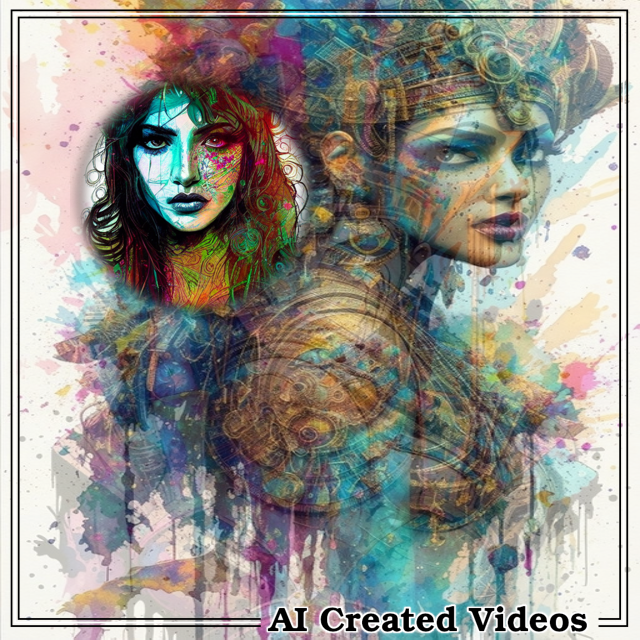

In [12]:
create_image()

In [58]:
for i in range(0,10):
    sleep(3)
    create_image()

/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-09421486665358547.jpg
A copy of this image is saved as:  junk/20230418-235750792__.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-04105648138395357.jpg
A copy of this image is saved as:  junk/20230418-235754279__.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-7995423778101528.jpg
A copy of this image is saved as:  junk/20230418-235757814__.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-9558770081705943.jpg
A copy of this image is saved as:  junk/20230418-235801294__.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-8198131993627626.jpg
A copy of this image is saved as:  junk/20230418-235804766__.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-49960288257176755.jpg
A copy of this image is saved as:  junk/20230418-235808204__.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-5176336769181759.jpg
A copy of this image is saved as:  junk/2023041

In [96]:
!pwd

/mnt/HDD500/collections/newdownloads/mine-new


In [60]:
!mkdir junk512x768

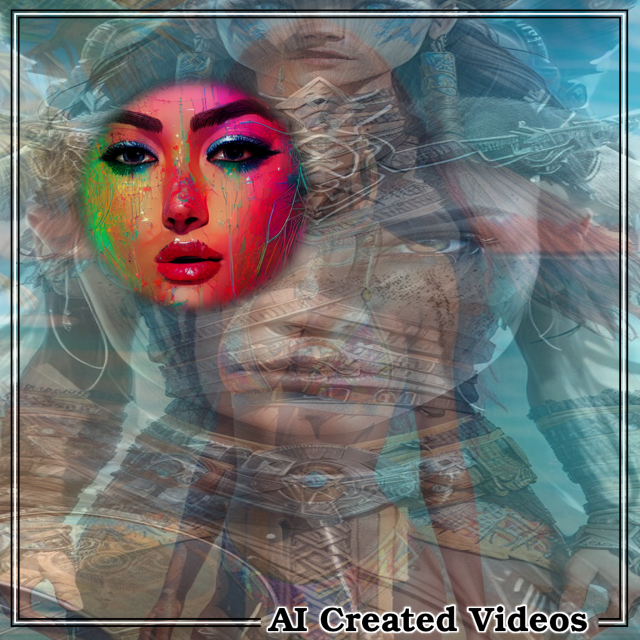

In [59]:
import glob
import random
filename = random.choice(glob.glob("junk/*__.png"))
im = Image.open(filename)
im

In [97]:
from PIL import Image, ImageDraw, ImageFilter
import glob
import random
from random import randint
import time
from datetime import datetime
from time import sleep

'''def circle_blur(file_name, count):
    im1 = Image.open(file_name)
    im1 = im1.resize((600, 600), Image.BICUBIC)
    im2 = Image.new("RGBA", im1.size, (0, 0, 0, 0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((25, 25, 575, 575), fill=255)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(15))
'''
def circle_blur(file_name, count):
    im1 = Image.open(file_name)
    im1 = im1.resize((600, 600), Image.BICUBIC)
    im2 = Image.new("RGBA", im1.size, (0, 0, 0, 0))
    mask = Image.new("L", im1.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((25, 25, 575, 575), fill=255)
    im = Image.composite(im1, im2, mask)
    mask_blur = mask.filter(ImageFilter.GaussianBlur(15))
    im = Image.composite(im1, im2, mask_blur)
    timestr = time.strftime('%Y%m%d-%H%M%S')
    save_directory = "junk"
    file_path = f"{save_directory}{timestr}{count + 1}X.png"
    im.save(file_path)
    return im
def get_images():
    directorylist = glob.glob("*.jpg")
    M = random.sample(directorylist, 3)
    M1 = random.choice(glob.glob(M[0]))
    M2 = random.choice(glob.glob(M[1]))
    M3 = random.choice(glob.glob(M[2]))
    return M1, M2, M3

def save_file():
    save_directory = "junk512x768/"
    now = datetime.now()
    timestr = time.strftime('%Y%m%d-%H%M%S')
    milliseconds = now.microsecond // 1000
    file_name = f"{save_directory}{timestr}{str(milliseconds).zfill(3)}512x768.png"
    return file_name


def create_imageA():
    M1, M2, M3 = get_images()
    img1 = Image.open(M1).convert("RGBA")
    img1 = img1.resize((512,768), Image.BICUBIC)
    alpha = img1.split()[3]
    alpha = Image.eval(alpha, lambda a: 85)
    img1.putalpha(alpha)
    img2 = Image.open(M2).convert("RGBA")
    img2 = img2.resize((512,768), Image.BICUBIC)
    alpha = img2.split()[3]
    alpha = Image.eval(alpha, lambda a: 85)
    img2.putalpha(alpha)
    img3 = Image.open(M3).convert("RGBA")
    img3 = img3.resize((512,768), Image.BICUBIC)
    alpha = img3.split()[3]
    alpha = Image.eval(alpha, lambda a: 85)
    img3.putalpha(alpha)
    result = Image.alpha_composite(Image.alpha_composite(img1, img2), img3)
    im4 = Image.new("RGBA", img3.size, (255, 255, 255, 255))
    im4.paste(result, (0, 0))
    im4 =im4.convert("RGB")
    # Display the resulting image with no transparency
    #List5 = glob.glob("/home/jack/Desktop/HDD500/collections/art-nouveau/*.jpg")
    List5 = glob.glob("/home/jack/Desktop/HDD500/collections/Prodia_640x640/*.jpg")
    FILEname = random.choice(List5)
    img5 = Image.open(FILEname).convert("RGBA").resize((512,768),Image.BICUBIC)
    saveDirectory = "junk512x768/"
    count = 1
    print(FILEname)
    im = circle_blur(FILEname, count)
    #im = circle_blur(FILEname,saveDirectory,count)
    im = im.resize((250,250),Image.BICUBIC)
    loc = 640//2-250
    print(loc)
    offseth= randint(250,405)
    offsetw= randint(100,200)
    im4.paste(im, (loc+offsetw, loc+offseth),im)
    Border = "/mnt/HDD500/YOUTUBE/assets/canvas-boarder.png"
    border = Image.open(Border)
    border = border.resize((im4.size),Image.BICUBIC).convert("RGBA")
    im4.paste(border, (0,0),border)
    im4.save(save_file())
    print("A copy of this image is saved as: ",save_file())
    return im4

/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-21548571675074224.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091132442512x768.png


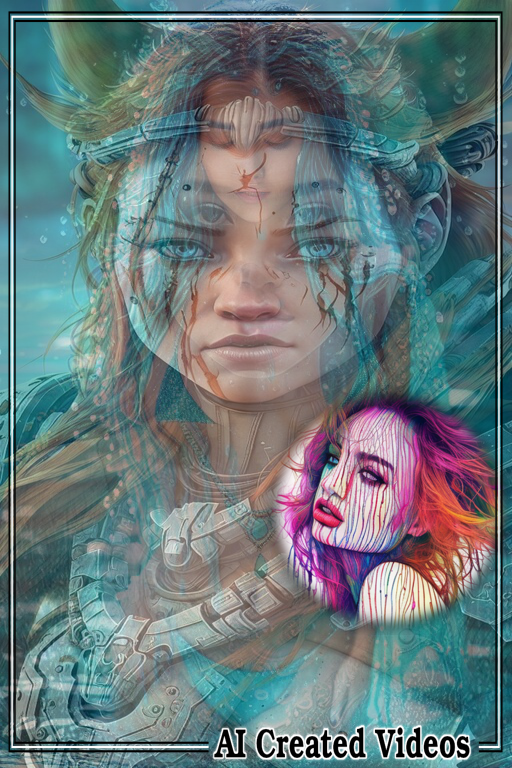

In [98]:
create_imageA()

In [99]:
for i in range(0,100):
    sleep(3)
    create_imageA()

/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-8402858204007373.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091145090512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-8949545424764499.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091148560512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-9754317772147526.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091152198512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-1781952283323478.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091155857512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-09728398977226937.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091159673512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-1781952283323478.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091203408512x768.png
/home/jack/Desktop/HDD500/collections/P

70
A copy of this image is saved as:  junk512x768/20230419-091454635512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-7488198739784578.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091458146512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-9766547829427311.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091501614512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-49960288257176755.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091505124512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-2094863155021356.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091508549512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-8198131993627626.jpg
70
A copy of this image is saved as:  junk512x768/20230419-091512041512x768.png
/home/jack/Desktop/HDD500/collections/Prodia_640x640/cover-21548571675074224.jpg
70
A copy of this image is saved as:  

In [48]:
!ls junk/

20230418-1123222X.png	  20230418-115648282__.png  20230418-120403095__.png
20230418-1124072X.png	  20230418-115651821__.png  20230418-120406618__.png
20230418-112407831__.png  20230418-115655269__.png  20230418-120410120__.png
20230418-113935729__.png  20230418-115658958__.png  20230418-120413576__.png
20230418-113939237__.png  20230418-115702436__.png  20230418-120417240__.png
20230418-113942830__.png  20230418-115706016__.png  20230418-120420838__.png
20230418-113946418__.png  20230418-115709594__.png  20230418-120424433__.png
20230418-113950140__.png  20230418-115713103__.png  20230418-120427857__.png
20230418-113953979__.png  20230418-115716658__.png  20230418-120431535__.png
20230418-113957611__.png  20230418-115720124__.png  20230418-120435056__.png
20230418-114001332__.png  20230418-115723708__.png  20230418-120438558__.png
20230418-114004886__.png  20230418-115727306__.png  20230418-120441990__.png
20230418-114008552__.png  20230418-115730961__.png  20230418-120445485__.png
202